# Survival on the Titanic:
An exploratory analysis into Python for Data Science and Machine Learning
### A Project by Evan Ticknor

- Project Case
- Data Collection
- Exploratory Data Analysis
- Feature Selection and Editing
- Cross Validation
- Model Selection
- Hyper Parameter Tuning Set-up
- Modelling
- Evaluation of Model
- Testing and Export
- Acknowledgements


## 1. Project Case

Create a model to classify a subset of travellers on the Titanic as either Survived or Died using any methods available.

Data is provided by the Kaggle Competition labeled, Titanic: Machine Learning from Disaster. This includes the split between our training and test data. Labels for the test data are not provided by the site, thus a summary of final results are discussed but not explicitly shown.

## 2. Data Collection
Data from the compeition is stored in two separate .csv files labeled 'train' and test'. Using the pandas package the data is stored as a pandas DataFrame.

In [1]:
import pandas as pd

train_data  =  pd.read_csv(r'C:\Users\Evan\Documents\Python Scripts\Titanic\train.csv')
test_data   =  pd.read_csv(r'C:\Users\Evan\Documents\Python Scripts\Titanic\test.csv')

#for purposes of ease of reading, warnings will be disabled as well
import warnings
warnings.filterwarnings('ignore')

## 3. Exploratory Data Analysis

As a basic understanding of the underlying structure of the dataset, we want to understand
- Total # of Columns
- Datatypes of each Column
- Total # of Passengers in Train/Test data
- Columns with missing values

In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can confirm the test dataset was created with a adequete number of data points in relation to our training data, as well as reflective of the amount of information retained in documentation. (ie missing values)

In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From our initial look into the data, the cabin information as well as specific age of many passengers was lost in the collection of information. A single Fare datapoint will also have to be imputed on test data, as we must submit a classifcation for all 418 passengers for the competition.

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Description of Data
For our integer and float values, a description of basic statistical values is shown. At first glance:
- 38% of the passengers in our training data survived the sinking
- Based on mean and std, most passengers were traveling alone or with a spouse
- Fares for the trip vary widely

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 4. Feature Selection

### 4.1 Prior Knowledge of Titanic Crash
Based on the basic knowledge of the crash and the ensuing evacuation to the lifeboats, we understand:
- Women and children were prioritized for places in the lifeboats
- First Class cabins were in closer proximity to life boats
- A portion of Third Class cabins were located near the bow of the boat, where the Titanic was submerged first

Thus factors involving position of cabin in the boat or priority boarding onto the lifeboats should prove signifigant.


### 4.2 Data Visualization
Explain techniques to visualize data

In [6]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#### Gender Survival

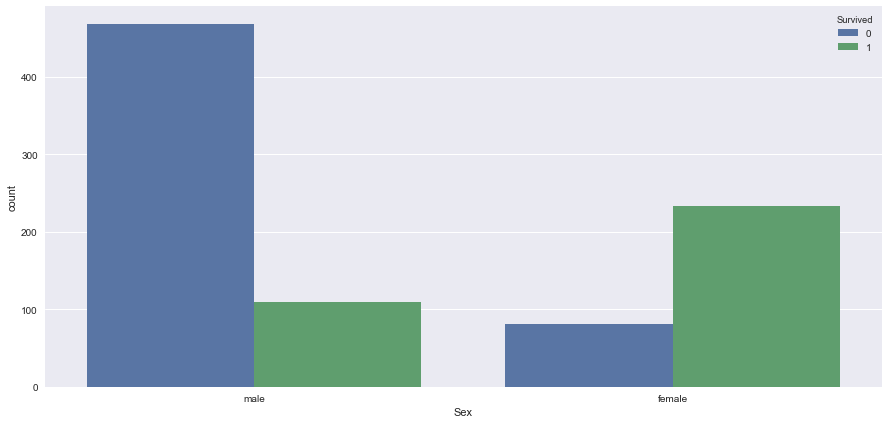

In [7]:
import seaborn as sns

fig, gen_plot = plt.subplots(figsize=(15, 7))
gen_plot = sns.countplot(x="Sex", hue="Survived", data=train_data);

This confirms our prior knowledge, where the female gender was overwhelmingly prioritized for boarding the lifeboats.

#### Gender/Class Survival

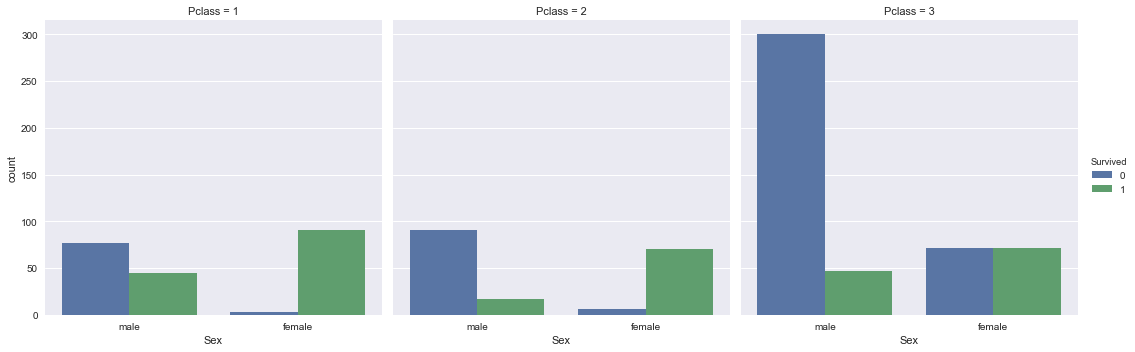

In [8]:
gp_plot = sns.catplot(x="Sex", col="Pclass", data=train_data, kind="count", hue="Survived");

For both genders, Cabin class was correlated to survival rate. 

#### Family Size Survival Rate

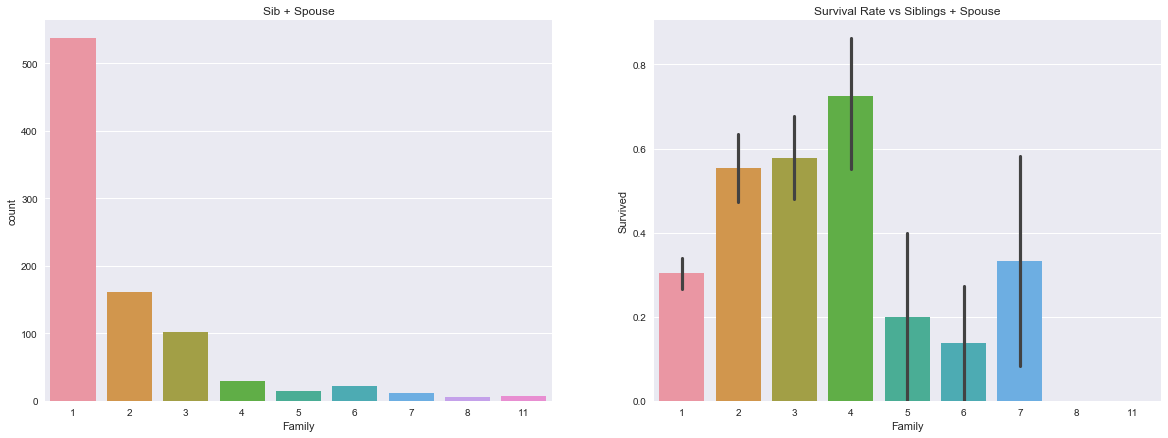

In [9]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family'] = test_data['SibSp'] + test_data['Parch'] + 1
fx, axes = plt.subplots(1, 2, figsize=(20,7))
axes[0].set_title('Sib + Spouse')
axes[1].set_title('Survival Rate vs Siblings + Spouse')
fig1_family = sns.countplot(x=train_data.Family, ax=axes[0])
fig2_family = sns.barplot(x=train_data.Family, y=train_data.Survived, ax=axes[1])

There is a non-linear trend to the family size vs survival rate. A deeper look into the class divide amongst families may show insights.

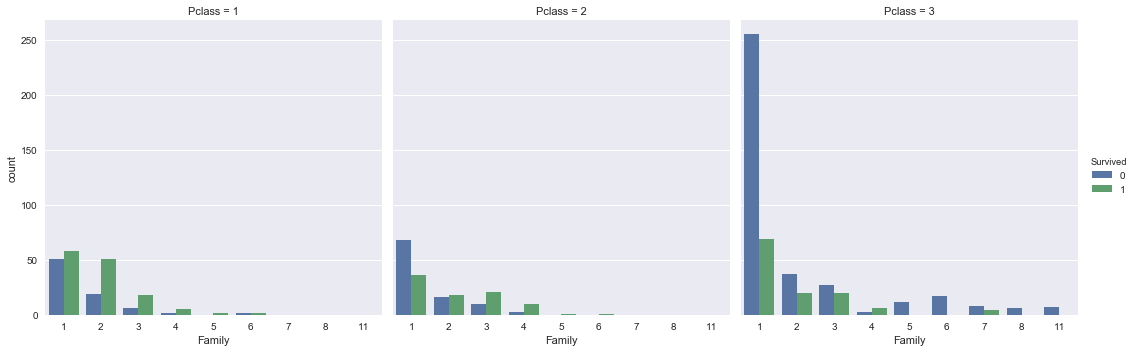

In [10]:
gp_plot = sns.catplot(x="Family", col="Pclass", data=train_data, kind="count", hue="Survived");

From the data, traveling alone decreased probability of survival. For all classes, having a medium family size (ie children) increases chances of a family member surviving. Large families are almost entirely populated by Class 3 passengers and had a low probability of survival.

#### Survival Rate by Age

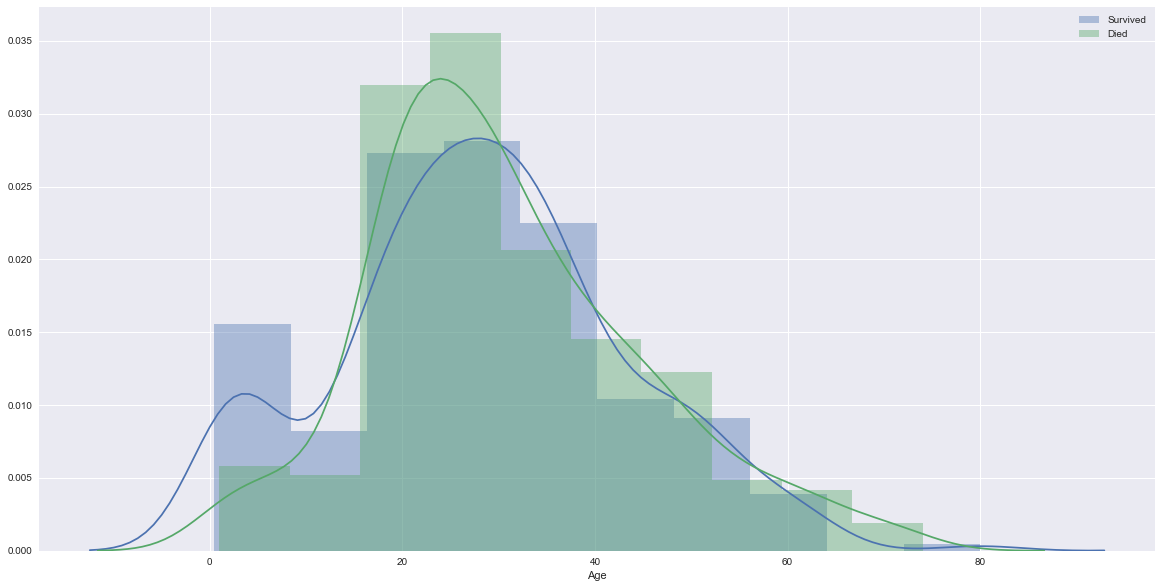

In [11]:
fig, age_plot = plt.subplots(figsize=(20, 10))
age_plot = sns.distplot(train_data[train_data['Survived'] == 1].Age.dropna(),
                        bins = 10, label = 'Survived',)
age_plot = sns.distplot(train_data[train_data['Survived'] == 0].Age.dropna(),
                        bins = 10, label = 'Died',)
age_plot.legend()
plt.show()

The survivors seem to have a twin peaked trend on the kernal density approximation. This would make sense, as children and their respective younger mother were prioritized for lifeboat boarding.

#### Survival Rate by Fare

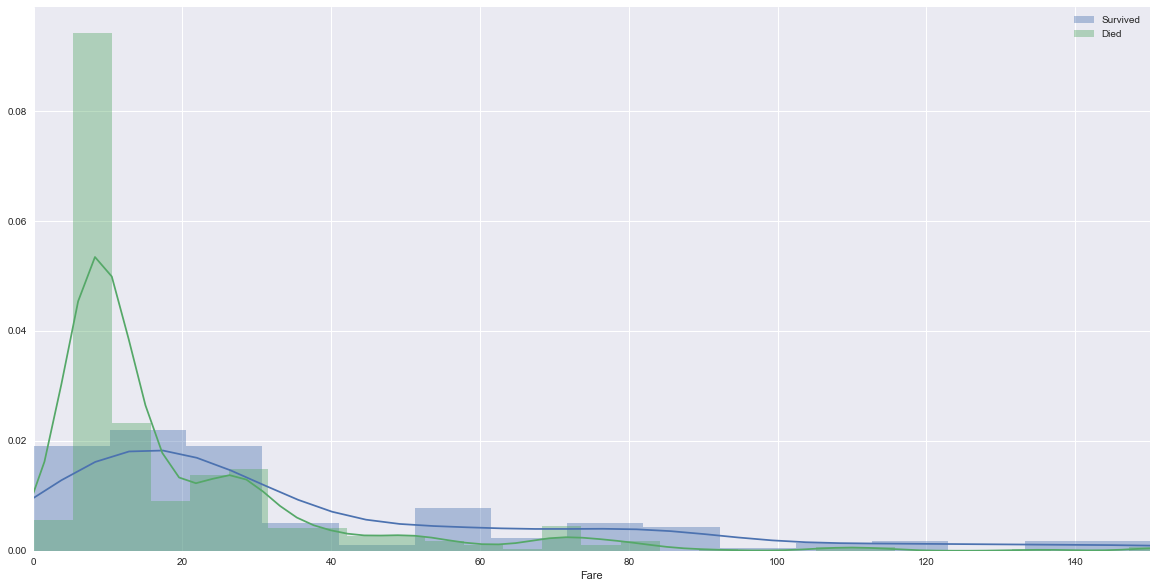

In [12]:
fig, age_plot = plt.subplots(figsize=(20, 10))
fare_plot = sns.distplot(train_data[train_data['Survived'] == 1].Fare.dropna(), bins = 50,
                         label = 'Survived')
fare_plot = sns.distplot(train_data[train_data['Survived'] == 0].Fare.dropna(), bins = 50,
                         label = 'Died')
fare_plot.legend()
plt.xlim(0,150)
plt.show()

As expected, higher fares indicate a higher probability of survival.

### 4.3 Compare Background with Linear Correlation of Features
Provide info on running correlation

In [13]:
corr_matrix = train_data.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
Family         0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Fare and Class appear to have strong linear correlations to survival. Family size shows a low linear correlation, but this is to be expected based on our non-linear observations in the data visualization.

###  4.4 Converting Gender from String to Integer
This will enable our models to compute properly.

In [14]:
Sex = {'male': 0,'female': 1} 
train_data.Sex  = [Sex[item] for item in train_data.Sex]
test_data.Sex   = [Sex[item] for item in test_data.Sex]

### 4.5 Converting Names to Useful Title Categories
The Name column in the dataset is a string that might be useful when broken down to its most basic components. Those with titles in their names may prove to be more prone to survival based on percieved occupational importance or social status.

In [15]:
data = [train_data, test_data]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Special": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)


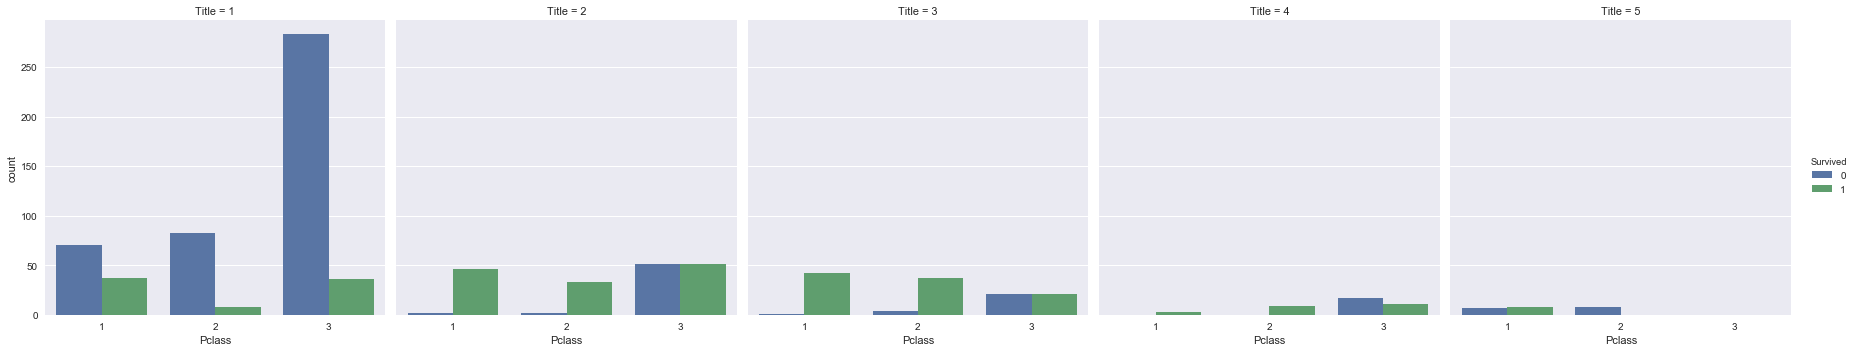

In [16]:
gp_plot = sns.catplot(x="Pclass", col="Title", data=train_data, kind="count", hue="Survived");

In [17]:
print(titles)

{'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Special': 5}


### 4.6 Adjusting for Missing Values in Age and Converting to Age Groups
For the missing ages, we are simply taking the mean of the dataset and applying to any NaN values in our dataframe. We are then converting the ages into six distinct groups for more generalized estimations.

In [18]:
import numpy as np

train_data.fillna(np.mean(train_data.Age), inplace=True)
test_data.fillna(np.mean(test_data.Age), inplace=True)

data = [train_data, test_data]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 12, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 50, 'Age'] = 6

### 4.7 Adjusting for Missing Ticket Fare (Fare == 0)
There is one Fare value in test data that requires imputation. As well, any $0 fare is converted to the mean of the total respective dataset.

In [19]:
data = [train_data, test_data]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)
    mean_fare = np.mean(dataset['Fare'])
    dataset['Fare'] = dataset.Fare.mask(dataset.Fare == 0,mean_fare)

##  4.8 Final Feature Selection
Chosen:
- Sex, Age, Pclass, Fare, Family(size), Title

Dropped:
- Name, Cabin(missing values), Ticket (no usable relation), Embarked

In [20]:
features_train  = pd.DataFrame(train_data, columns=['Sex', 'Age', 'Pclass', 'Fare', 'Family', 'Title'])
labels_train    = train_data['Survived']
features_train.head()

,Sex,Age,Pclass,Fare,Family,Title
0,0,2,3,7.0,2,1
1,1,4,1,71.0,2,3
2,1,3,3,7.0,1,2
3,1,4,1,53.0,2,3
4,0,4,3,8.0,1,1


In [21]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Sex       891 non-null int64
Age       891 non-null int32
Pclass    891 non-null int64
Fare      891 non-null float64
Family    891 non-null int64
Title     891 non-null int64
dtypes: float64(1), int32(1), int64(4)
memory usage: 38.4 KB


## 5. Cross Validation Set-up
A K-Fold Cross Validation technique will be used to best approximate the models' accuracy and tendency for overfitting or selection bias. Given the inability to fully investigate the results of the test data set, we will use this technique to provide more backing for the ability of each model to generalize to new test data.

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

## 6. Model Selection
Three models are explored:
- Random Forest
- Gaussian Naive Bayes
- Support Vector Machine

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

C:\Users\Evan\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 6.1 Random Forest Classifier
Via scikit-learn.org

"A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting."

In [24]:
clf_rf = RandomForestClassifier(random_state=42)
score_rf = cross_val_score(clf_rf, features_train, labels_train, cv=k_fold, scoring='accuracy')
print(score_rf)

[0.84444444 0.84269663 0.79775281 0.76404494 0.79775281 0.83146067
 0.78651685 0.83146067 0.7752809  0.91011236]


In [25]:
print('Classifier Accuracy', round(np.mean(score_rf)*100,2), 'Std Dev', round(np.std(score_rf),3))

Classifier Accuracy 81.82 Std Dev 0.041


### 6.2 Gaussian Naive Bayes Classifier
via Wikipedia.org/Naive_Bayes_Classifier

"In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features."

In [26]:
clf_NB = GaussianNB()
score_nb = cross_val_score(clf_NB, features_train, labels_train, cv=k_fold, scoring='accuracy')
print(score_nb)

[0.78888889 0.76404494 0.83146067 0.7752809  0.85393258 0.83146067
 0.7752809  0.73033708 0.75280899 0.87640449]


In [27]:
print('Classifier Accuracy', round(np.mean(score_nb)*100,2), 'Std Dev', round(np.std(score_nb),3))

Classifier Accuracy 79.8 Std Dev 0.045


###  6.3 Support Vector Machine Classifier
via Wikipedia.org/Support-vector_machine

"An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall."

In [28]:
clf_SVC = SVC(random_state=42)
score_svc = cross_val_score(clf_SVC, features_train, labels_train, cv=k_fold, scoring='accuracy')
print(score_svc)

[0.8        0.7752809  0.7752809  0.75280899 0.78651685 0.83146067
 0.76404494 0.78651685 0.74157303 0.86516854]


In [29]:
print('Classifier Accuracy', round(np.mean(score_svc)*100,2), 'Std Dev', round(np.std(score_svc),2))

Classifier Accuracy 78.79 Std Dev 0.04


###  6.4 Feature Importances in Random Forest
Based on our accuracy results, we will proceed with the Random Forest Classifier. We can gain insights into the importance of each feature in the decision trees found in the RF classifier.

In [30]:
clf_rf.fit(features_train, labels_train)
importances = pd.DataFrame({'Feature':features_train.columns,'Importance':np.round(clf_rf.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False).set_index('Feature')
importances.head(6)

,Importance
Feature,
Fare,0.278
Title,0.263
Sex,0.136
Age,0.126
Pclass,0.106
Family,0.092


We can see the Fare and Title carry the strongest importance in the classifier, but all carry enough weight to proceed with the features into our next step.

## 7. Grid Search for Hyper-Tuning of Classifier
Using a Grid Search via our sklearn extension, multiple tuning parameters can be tested at varying levels. For this projects purpose, an exhaustive search between specific parameter values will be used rather than a random search or other GridSearch method.

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = [{'n_estimators': [10, 100, 200, 600], 'min_samples_leaf': [1, 5, 10], "criterion": ["gini"]}]

In [33]:
clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid_search.fit(features_train, labels_train)
grid_search.best_params_
print(grid_search.best_params_)
print('Accuracy of Hyper-tuned Model', grid_search.best_score_)

{'criterion': 'gini', 'min_samples_leaf': 5, 'n_estimators': 200}
Accuracy of Hyper-tuned Model 0.8383838383838383


It appears from tuning we obtained an additional 2% accuracy on our training data!

## 8. Creation of Model
Random Forest Classification Model

In [34]:
clf_rf = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, random_state=42)
clf_rf.fit(features_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## 9. Model Evaluation

In [35]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

predictions = cross_val_predict(clf_rf, features_train, labels_train, cv=k_fold)
confusion_matrix(labels_train, predictions)

array([[496,  53],
       [ 96, 246]], dtype=int64)

Based on our evaluations of the training data:
- 496 Passengers were correctly identified as Deceased (True Negative)
- 53 Passengers were incorrectly identified as Deceased (False Positive)
- 96 Passengers were incorrectly identified as Survived (False Negative)
- 246 Passengers were correctly identified as Survived (True Positive)

###  Precision and Recall

In [36]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(labels_train, predictions))
print("Recall:",recall_score(labels_train, predictions))

Precision: 0.822742474916388
Recall: 0.7192982456140351


The model predicts 82.2% of the time, a passengers survival correctly (precision). The recall indicates it predicted survival of 72 % of people who actually survived.

### Reciever Operating Characteristic - Area Under Curve Score
Based on the area under the ROC curve, a single value between 0 and 1 can be derived. A perfect classifier would have a score of 1, versus a completely random classifier would have a score of 0.5.

In [37]:
from sklearn.metrics import roc_auc_score
y_scores = clf_rf.predict_proba(features_train)
y_scores = y_scores[:,1]
r_a_score = roc_auc_score(labels_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9204587820492336


Based on the performance metrics, the model appears ready for submission.

## Visualizing the Random Tree Classifier


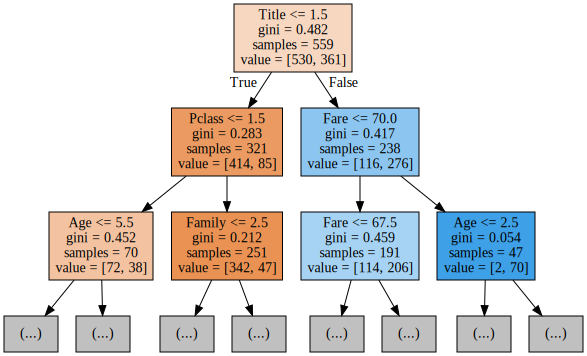

In [38]:
estimator = clf_rf.estimators_[7]

from sklearn.tree import export_graphviz

export_graphviz(estimator, out_file='tree.dot', filled = True, max_depth=2,
                feature_names = features_train.columns)

import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## 10. Prediction and Export

In [39]:
features_test  = pd.DataFrame(test_data, columns=['Sex', 'Age', 'Pclass', 'Fare', 'Family', 'Title'])
features_test.fillna(np.mean(features_test.Age), inplace=True)
mean_fare=np.mean(features_test.Fare)
features_test.Fare=features_train.Fare.mask(features_test.Fare == 0,mean_fare)

In [40]:
features_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Sex       418 non-null int64
Age       418 non-null int32
Pclass    418 non-null int64
Fare      418 non-null float64
Family    418 non-null int64
Title     418 non-null int64
dtypes: float64(1), int32(1), int64(4)
memory usage: 18.0 KB


In [41]:
pred = clf_rf.predict(features_test)
pred = pd.Series(pred)                  

results = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred})

#print answer to csv file
results.to_csv('final_rfc.csv', index = False)

## Acknowledgements

Kaggle: Titanic: Machine Learning from Disaster

"Predicting the Survival of Titanic Passengers" By: Niklas Donges - Used for help on Title Processing and Evaluation Metrics

"Hands-On Machine Learning with Scikit-Learn and TensorFlow" By: Aurelien Geron